In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('kc_house_train_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
17380,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
17381,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
17382,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Residual Sum Squares    

Prueba decodigo propio

aqui realizaremos el algoritmo de la gradiente descendiente 

In [4]:
def rss(x,y,w,step,tol):
    # la función z contiene la gradiente respecto a W0 y W1 para un funcion lineal 
    def z (x,y,w):
        z=list()
        t1=0
        t2=0
        for i in range(len(x)):

            t1=t1+( y[i]-(w[0]+w[1]*x[i]) )
            t2=t2+( ( y[i]-(w[0]+w[1]*x[i]) )*x[i] )

        #dividimos entre la cantidad de datos (len(x)) para normalizar    
        z.append((-2/len(x))*t1)
        z.append((-2/len(x))*t2)
        return z

    rss=list()
    #usamos la tecnica de la gradiente descendiente aproximandolo al valor
    #donde los pesos obtienen el menor residuo cuadrado
    grad=z(x,y,w)
    magnitud=np.sqrt(grad[0]**2+grad[1]**2)
    while magnitud>tol:
        w0=w[0]-step*grad[0]
        w1=w[1]-step*grad[1]
        w=[w0,w1]
        grad=z(x,y,w)
        magnitud=np.sqrt(grad[0]**2+grad[1]**2)
    rss.append(w[0])
    rss.append(w[1])
    return rss

codigo mejorado

In [ ]:
# import numpy as np

# def rss(x, y, w, step, tol):
#     def z(x, y, w):
#         t1 = np.sum(y - (w[0] + w[1] * x))
#         t2 = np.sum((y - (w[0] + w[1] * x)) * x)
#         grad = np.array([(-2/len(x)) * t1, (-2/len(x)) * t2])
#         return grad

#     rss = []
#     grad = z(x, y, w)
#     magnitud = np.sqrt(np.sum(grad**2))
#     while magnitud > tol:
#         w -= step * grad
#         grad = z(x, y, w)
#         magnitud = np.sqrt(np.sum(grad**2))
#     rss.extend(w)
#     return rss

# # Ejemplo de uso
# x = np.array([1, 2, 3, 4, 5], dtype=np.float64)
# y = np.array([2, 4, 6, 8, 10], dtype=np.float64)
# initial_w = np.array([0.0, 0.0], dtype=np.float64)
# step_size = 0.01
# tolerance = 1e-6
# result = rss(x, y, initial_w, step_size, tolerance)
# print("Coeficientes encontrados:", result)

otro codigo


In [ ]:
# import numpy as np

# # Datos de ejemplo (pares de entrada y salida)
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([2, 4, 5, 4, 5])

# # Hiperparámetros
# learning_rate = 0.01
# tolerance = 1e-5  # Tolerancia para la magnitud del gradiente
# max_epochs = 10000

# # Inicialización de los parámetros del modelo
# slope = 0.0
# intercept = 0.0

# # Gradiente descendente con criterio de convergencia basado en la magnitud del gradiente
# for epoch in range(max_epochs):
#     y_pred = slope * x + intercept  # Predicción del modelo
    
#     # Cálculo de los gradientes
#     slope_gradient = (-2 / len(x)) * np.sum(x * (y - y_pred))
#     intercept_gradient = (-2 / len(x)) * np.sum(y - y_pred)
    
#     # Cálculo de la magnitud del gradiente
#     gradient_magnitude = np.sqrt(slope_gradient ** 2 + intercept_gradient ** 2)
    
#     # Comprobar el criterio de convergencia
#     if gradient_magnitude < tolerance:
#         print(f"Convergencia alcanzada en la época {epoch + 1}.")
#         break
    
#     # Actualización de los parámetros
#     slope -= learning_rate * slope_gradient
#     intercept -= learning_rate * intercept_gradient

# # Imprimir los parámetros aprendidos
# print("Slope:", slope)
# print("Intercept:", intercept)

Ejemplo simple para ver el funcionamiento

In [89]:

x=[1,2,3,4]
y=[2,4,6,8]
w=[0,0]

In [90]:
rss(x,y,w,0.1,0.1)

[0.312302800651448, 1.893480050268565]

In [91]:
yy=list()
pesos=rss(x,y,w,0.01,0.01)
for i in x:
    yy.append(pesos[0]+pesos[1]*i)
print (yy)  

[2.0208607668243914, 4.0101084701143686, 5.999356173404346, 7.988603876694323]


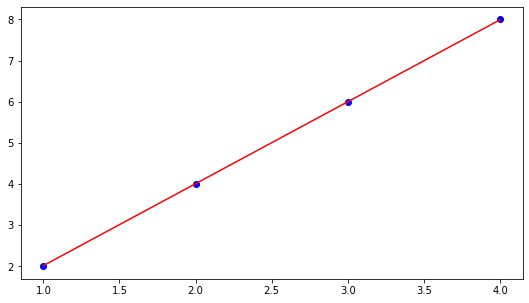

In [92]:
fig, graph = plt.subplots(figsize = (9, 5))
graph.scatter(x,y,color='blue') #datos reales
graph.plot(x,yy,color='red')    #datos predichos

# OBSERVACION

No se pudo usar los datos del dataframe debido a que resulta complicado encontrar los parametros adecuados para la taza de aprendizaje y tolerancia. Queda como pendiente de una futura investigación

Usando la libreria sklearn

In [93]:
regr = LinearRegression()
regr.fit(np.array(df['sqft_living']).reshape(-1,1),np.array(df['price']))

LinearRegression()

In [94]:
regr.intercept_

-47116.07907289406

In [95]:
#se pone [0] porque como estamos en lineal obtiene el primer valor , si estuvieramos en polinomial pudieramos
#acceder a cualquier coeficiente
regr.coef_[0]

281.95883963034254

In [98]:
#yy1=regr.intercept_+regr.coef_[0]*np.array(df['sqft_living'])

In [100]:
yy1=regr.predict(np.array(df['sqft_living']).reshape(-1,1))

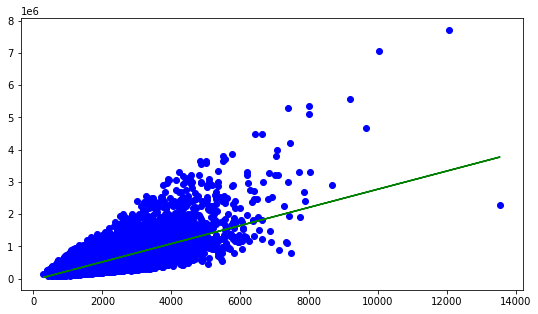

In [101]:
fig, graph = plt.subplots(figsize = (9, 5))
graph.scatter(np.array(df['sqft_living']),np.array(df['price']),color='blue')
#graph.plot(x,yy,color='red')
graph.plot(np.array(df['sqft_living']),yy1,color='green')